OBJECTIVES
1. Clean the data:
- Handle missing values ​​(null).
- Standardize date formats.
- Correct spelling errors in product or category names.
- Convert data types appropriate for analysis.

2. Analyze the data:
- Calculate total revenue by day.
- Identify best-selling products.

3. Visualize the data:
- Plot revenue by day.
- Pie chart showing revenue percentage by product category.

In [1]:
# Import needed libraries

import kagglehub 
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
# Download latest version data from kagglehub

path = kagglehub.dataset_download("ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training")
print("Path to dataset files:", path)

Path to dataset files: /home/gitpod/.cache/kagglehub/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/versions/1


In [3]:
# Show list of files in kaggle hub folder

file_path = '/home/gitpod/.cache/kagglehub/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/versions/1'
all_files = os.listdir(file_path)
print('This folder includes the following files:')
for file in all_files:
    print(file)

This folder includes the following files:
dirty_cafe_sales.csv


In [84]:
# Read csv file

raw = pd.read_csv('/home/gitpod/.cache/kagglehub/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/versions/1/dirty_cafe_sales.csv')

In [85]:
# Have a look throught the data

raw.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [86]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [87]:
# Change data type

raw['Quantity'] = pd.to_numeric(raw['Quantity'], errors='coerce')
raw['Price Per Unit'] = pd.to_numeric(raw['Price Per Unit'], errors='coerce')
raw['Transaction Date'] = pd.to_datetime(raw['Transaction Date'], errors='coerce')

# using error = coerce to change all Error data to NaN

In [114]:
# Drop null and UNKNOWN from "item'

raw = raw[raw['Item'].notna()].copy()
raw = raw[raw['Item'] != "UNKNOWN"]
raw = raw[raw['Item'] != "ERROR"]

In [115]:
# Check how many null value in the dataframe

raw.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [116]:
# After verifying each item (using raw[raw['Item'] == 'Cake'], etc ... ), 
# it is confirmed that each item has a unique value for 'Price per unit'.

# There are 492 null in 'Price per unit' column.
# which can be filled using the corresponding item's known price

# Create a dictionary mapping each Item to its respective Price per unit.

In [117]:
item_to_price = {}
for key, group in raw.groupby('Item'):
    price = group['Price Per Unit'].dropna()  # price = value in column 'Price per unit' in group, dropna
    item_to_price[key] = price.iloc[0]        # take the first values in series 'price' and save it to dictionary with the name key

# When using for loop with .groupby, python return each loop with (key, group)
# key is the unique item // group is the "small" dataframe for each unique item

In [118]:
print('Price per Unit by Item',)
item_to_price

Price per Unit by Item


{'Cake': np.float64(3.0),
 'Coffee': np.float64(2.0),
 'Cookie': np.float64(1.0),
 'Juice': np.float64(3.0),
 'Salad': np.float64(5.0),
 'Sandwich': np.float64(4.0),
 'Smoothie': np.float64(4.0),
 'Tea': np.float64(1.5)}

In [119]:
# Fill in 'Price Per Unit' by mapping from the dictionary

raw['Price Per Unit'] = raw['Price Per Unit'].fillna(raw['Item'].map(item_to_price))

In [120]:
# Drop null from 'Quantity' column

raw = raw[raw['Quantity'].notna()].copy()

In [121]:
# Re calculate 'Total Spent' = 'Quantity' * 'Price Per Unit'

raw['Total Spent'] = raw['Quantity'] * raw['Price Per Unit']

In [122]:
# Drop null and UNKNOWN from 'Payment Method' and 'Location'

raw = raw[raw['Payment Method'].notna()].copy()
raw = raw[raw['Payment Method'] != "UNKNOWN"]

raw = raw[raw['Location'].notna()].copy()
raw = raw[raw['Location'] != "UNKNOWN"]

In [123]:
# Fill down in 'Transaction Date'

raw['Transaction Date'] = raw['Transaction Date'].ffill() # ffill replaces the null values with the value from the previous row

In [124]:
# Check the null again

raw.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [125]:
data=raw

In [151]:
# color paletes used for vizualizing

pastel_colors = [
    "#FFB3BA",  # pastel red/pink
    "#FFDFBA",  # pastel orange
    "#FFFFBA",  # pastel yellow
    "#BAFFC9",  # pastel green
    "#BAE1FF",  # pastel blue
    "#E3BAFF",  # pastel purple
    "#FFC9DE",  # pastel rose
    "#D5F3FF",  # light sky blue
    "#F0E3FF",  # lavender
    "#C2F0FC",  # soft cyan
    "#FCE1C3",  # soft peach
    "#FADADD"   # very light pink
]

## Calculate total revenue by day

In [126]:
revenue_by_day = data.groupby('Transaction Date')['Total Spent'].sum().reset_index()

In [127]:
revenue_by_day = revenue_by_day.rename(columns={'Total Spent': 'Revenue'})

In [128]:
revenue_by_day.sort_values(by = 'Transaction Date')

,Transaction Date,Revenue
0,2023-01-01,131.5
1,2023-01-02,103.5
2,2023-01-03,96.0
3,2023-01-04,63.5
4,2023-01-05,211.0
...,...,...
360,2023-12-27,73.5
361,2023-12-28,106.5
362,2023-12-29,89.0
363,2023-12-30,68.0


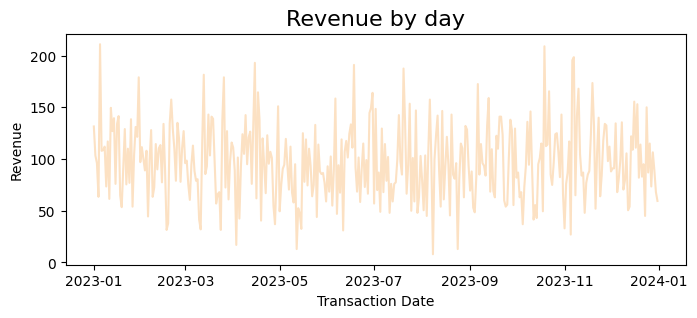

In [186]:
fig = plt.subplots(figsize = (8,3))
plt.plot(
    revenue_by_day['Transaction Date'], 
    revenue_by_day['Revenue'],
    color = '#FCE1C3'
)
plt.title('Revenue by day', fontsize=16)
plt.xlabel('Transaction Date')
plt.ylabel('Revenue')

plt.show()

## Identify best-selling products

In [143]:
best_selling_product = data.groupby('Item')['Total Spent'].sum().reset_index()

In [148]:
best_selling_product.sort_values(by = 'Total Spent', ascending = False).reset_index(drop=True)

,Item,Total Spent
0,Salad,7985.0
1,Sandwich,6196.0
2,Smoothie,5536.0
3,Juice,4647.0
4,Cake,4581.0
5,Coffee,2786.0
6,Tea,2209.5
7,Cookie,1530.0


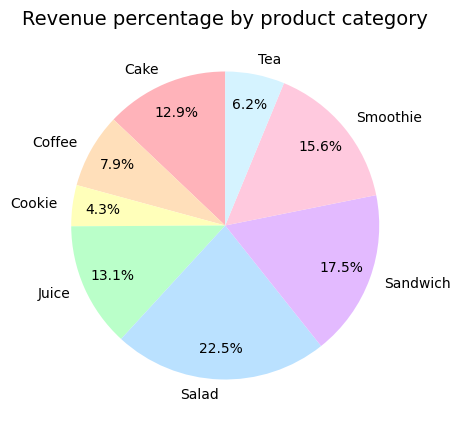

In [179]:
fig = plt.subplots(figsize = (5,5))
plt.pie(
    best_selling_product['Total Spent'],
    colors = pastel_colors,
    labels = best_selling_product['Item'],
    autopct = '%1.1f%%',
    startangle=90,
    pctdistance=0.8
)

plt.title('Revenue percentage by product category',fontsize = 14)
plt.show()

In [ ]:
#